In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = 'white'
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 10
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)
plt.rcParams["errorbar.capsize"] = 6
plt.rcParams['axes.titlepad'] = 20 


In [2]:
data=pd.read_csv("particles_data.csv", sep=",", header=0)
data

,id,natoms,natoms_surf,probability,100,110,111,211,100+110,100+111,100+211,110+111,110+211,111+211,100+110+111,100+110+211,100+111+211,110+111+211
0,1,19048,3520,3.930726e-04,0.275000,0.055682,0.669318,0.000000,0.011364,0.076136,0.000000,0.055682,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000
1,2,27156,4128,9.800000e-09,0.220930,0.133721,0.526163,0.119186,0.011628,0.000000,0.061047,0.058140,0.023256,0.058140,0.000000,0.011628,0.000000,0.011628
2,3,14235,3048,1.963808e-03,0.125984,0.102362,0.637795,0.133858,0.007874,0.000000,0.062992,0.094488,0.047244,0.070866,0.000000,0.015748,0.000000,0.031496
3,4,12406,2648,4.162561e-04,0.145015,0.145015,0.574018,0.135952,0.009063,0.000000,0.072508,0.090634,0.036254,0.063444,0.000000,0.018127,0.000000,0.018127
4,5,7171,1920,2.902000e-07,0.187500,0.125000,0.687500,0.000000,0.025000,0.075000,0.000000,0.125000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20203,20322,12073,2400,1.718220e-05,0.202917,0.194583,0.384583,0.217917,0.028750,0.000000,0.067083,0.050833,0.102500,0.095000,0.000000,0.027917,0.000000,0.022500
20204,20323,13698,2593,3.520760e-05,0.200154,0.162746,0.467027,0.170073,0.028153,0.005399,0.054763,0.055534,0.075202,0.074431,0.001928,0.021211,0.001928,0.015040
20205,20324,10686,2142,8.356000e-07,0.210084,0.270308,0.436041,0.083567,0.054155,0.013539,0.020075,0.095238,0.051354,0.046218,0.011204,0.012138,0.000467,0.017740
20206,20326,12777,2442,1.307730e-05,0.167076,0.232596,0.426290,0.174038,0.028256,0.000000,0.054464,0.072482,0.079853,0.071663,0.000000,0.022523,0.000000,0.023751


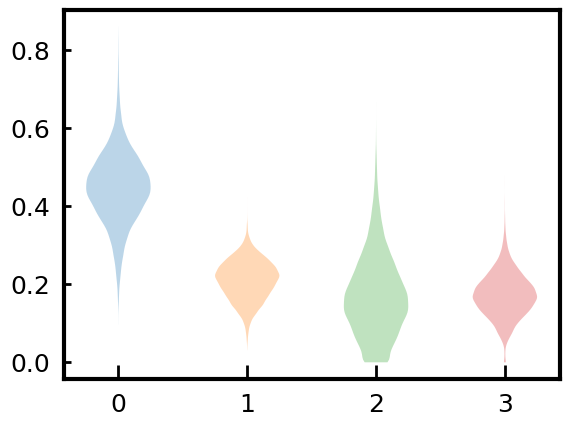

In [3]:
colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
gs=gridspec.GridSpec(nrows=1,ncols=1)
gs.update(wspace=0.8, hspace=0.3)

best = 9611

plt.figure()
ax0=plt.subplot(gs[0,0])

parts=ax0.violinplot(data['111'],positions=[0],showmeans=False,showmedians=False,showextrema=False)
parts=ax0.violinplot(data['100'],positions=[1],showmeans=False,showmedians=False,showextrema=False)
parts=ax0.violinplot(data['211'],positions=[2],showmeans=False,showmedians=False,showextrema=False)
parts=ax0.violinplot(data['110'],positions=[3],showmeans=False,showmedians=False,showextrema=False)

In [11]:
mean111=np.sum(data['110']*data['probability'])
mean100=np.sum(data['100']*data['probability'])
mean211=np.sum(data['211']*data['probability'])
mean110=np.sum(data['110']*data['probability'])

print(mean111+mean100+mean110+mean211)

0.5141126921693798


In [7]:
mean111=np.mean(data['111'])
mean111

0.44578027461044134

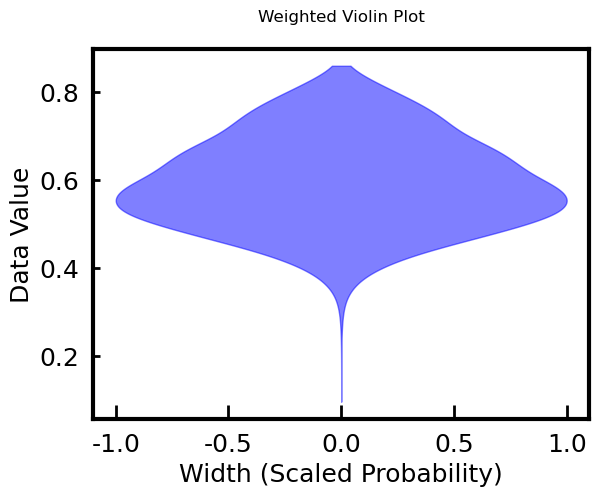

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# KDE computation with weights
values = data['111']
weights = data["probability"] / np.sum(data["probability"])  # Normalize weights
kde = gaussian_kde(values, weights=weights)

# Generate x-axis points
x = np.linspace(values.min(), values.max(), 1000)
pdf = kde(x)  # Probability density function

# Scale for the violin plot effect
pdf_scaled = pdf / pdf.max()  # Normalize to maximum width for plotting

# Plot the weighted violin
fig, ax = plt.subplots()
ax.fill_betweenx(x, -pdf_scaled, pdf_scaled, alpha=0.5, color='blue')
ax.set_title('Weighted Violin Plot')
ax.set_xlabel('Width (Scaled Probability)')
ax.set_ylabel('Data Value')
plt.show()

In [17]:
# Compute the weighted average
weighted_average = np.sum(x * pdf) / np.sum(pdf)
weighted_average

0.5931968369207178